# The Sparks Foundation : Data Science and Business Analytics Internship 



## Task 1 - Prediction Using Supervised Machine Learning

#### in this task it is required to predict the percentage of student on the basis of no of hours studied using the linear regression supervised machine learnig algorithm 

# Developer : Vaibhav Dixit

## Steps :

## Step:1 - Importing the dataset

##### In this step , we will import the dataset through the link with the help of pandas library and then we will observe the data

In [4]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading data from remote link
url ="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
df.shape

(25, 2)

In [9]:
#To find more information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#now we will check if our dataset contains null or missings vallues
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## STEP 2 - Visualizing the dataset


##### In this we will plot the dataset to check wheather we can observe any relation b/w the tow variables or not



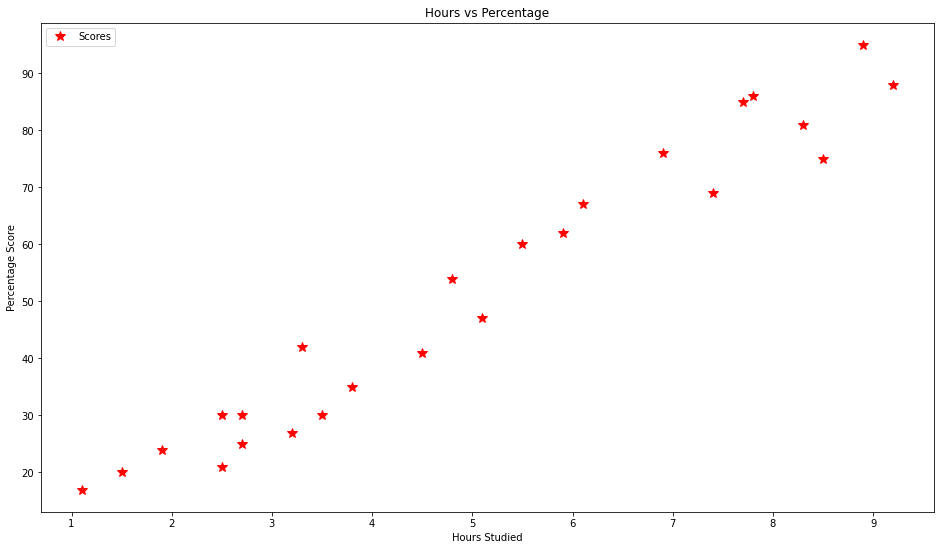

In [12]:
# plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours',y='Scores',style='*',color='red',markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

###### From the abobe graph, we can observe that there is alinear relationship b/w 'hours studied' and 'percentage score' . So we can use the linear regression supervised machine model on it to predict further values

In [13]:
#we can also use .corrto determine the correlation b/w the variables
df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## STEP 3- Data preparation

##### In this step we will divide the data inito "features"(inputs) and "label " (outputs) .After that we will split the whole dataset iinto 2 parts - testing and training data.

In [14]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
# using iloc funtion we will divide the data 
x = df.iloc[:, :1].values
y = df.iloc[:, 1:].values


In [16]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [18]:
# splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## STEP 4- Training the algorithm

##### we have splited our data into training and testing sets . and now we will train our model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## STEP 5 - Visualizing the model


##### After training the model, now its time to visualize it

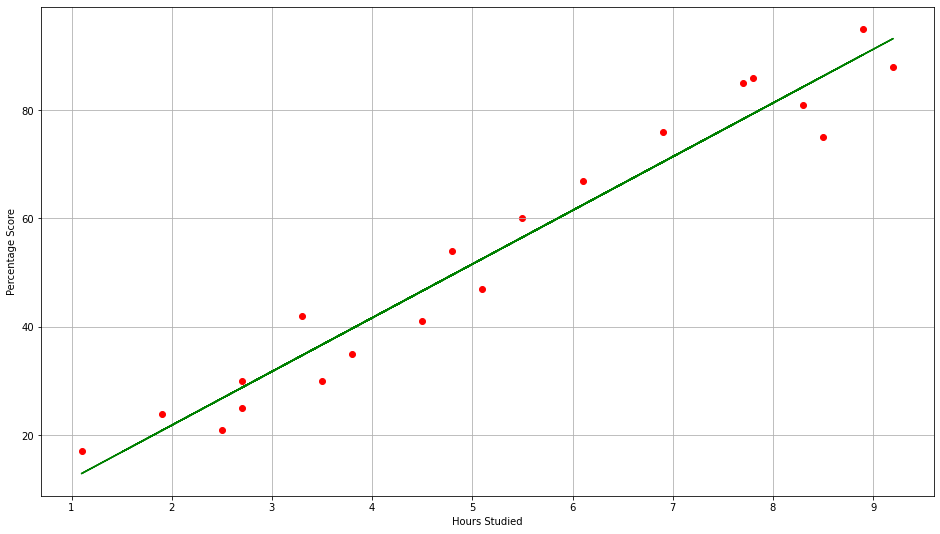

In [20]:
line = model.coef_*x + model.intercept_
#plotting for the trainig data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


## STEP 6 - Making predictions


##### now that we have trained our algorithm .it's time to make some predictions

In [21]:
#testing data (in hours)
print(x_test)
#predicting the scores
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# comparing actual vs predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [23]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [24]:
# comparing actual vs predicted
comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [25]:
# Testing with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


##### Hence, it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173249

## STEP 7- Evaluating the model


##### In the last step , we are going to evaluate our trained model by calculating mean absolute error

In [26]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


##### This is the end of TASK 1